In [1]:
import torch
hidden_states = torch.tensor(
    # [
    [[-0.083, 0.147],
     [0.029, 0.008],
     [-0.204, 0.132]],
)
d_hidden = 2
w_query = torch.nn.Linear(in_features=d_hidden, out_features=d_hidden, bias=False)
w_query.weight.data = torch.tensor(
    [[-0.381, -0.354],
     [ 0.407, -0.601]], 
    requires_grad=True).T
w_query(hidden_states)

tensor([[ 0.0915, -0.0590],
        [-0.0078, -0.0151],
        [ 0.1314, -0.0071]], grad_fn=<MmBackward0>)

## Example

Let's consider a simple example with 3 tokens, and let's work with an embedding dimension of 3. That means each token turns into a 3-dimensional vector.



In [25]:
prompt = "012"
# for i in range(3,10):
#     print(f"{i}: torch." )
#     print(torch.randint(-3,3,(1,3), dtype=torch.float32))

In [26]:
tokenizer = {
    0: torch.tensor([ 1.,  0.,  0.], dtype=torch.float32),
    1: torch.tensor([-2.,  1.,  0.], dtype=torch.float32),
    2: torch.tensor([-1.,  1.,  1.], dtype=torch.float32),
    3: torch.tensor([ 2.,  2.,  2.], dtype=torch.float32),
    4: torch.tensor([-1.,  0.,  0.], dtype=torch.float32),
    5: torch.tensor([-2., -1.,  0.], dtype=torch.float32),
    6: torch.tensor([-1.,  0., -1.], dtype=torch.float32),
    7: torch.tensor([ 2., -1., -3.], dtype=torch.float32),
    8: torch.tensor([-1.,  0., -3.], dtype=torch.float32),
    9: torch.tensor([-2.,  1.,  0.], dtype=torch.float32),
}

In [27]:
embedding_list = []
for input_id in prompt:
    embedding_list.append(tokenizer[int(input_id)])
hidden_states = torch.stack(embedding_list)
hidden_states

tensor([[ 1.,  0.,  0.],
        [-2.,  1.,  0.],
        [-1.,  1.,  1.]])

In [30]:
import torch
hidden_states = torch.tensor(
    [[1,0,0],
    [-2,1,0],
    [-1,1,1]],
    dtype=torch.float32,
)
weights = torch.tensor(
    [[2,1,1],
    [4,-6,0],
    [-2,7,2]],
    dtype=torch.float32,
    requires_grad=True)

d_hidden = 2
w_query = torch.nn.Linear(in_features=d_hidden, out_features=d_hidden, bias=False)
w_query.weight.data = weights.T

w_key = torch.nn.Linear(in_features=d_hidden, out_features=d_hidden, bias=False)
w_key.weight.data = weights.T

w_value = torch.nn.Linear(in_features=d_hidden, out_features=d_hidden, bias=False)
w_value.weight.data = weights.T

queries = w_query(hidden_states)
print(f"queries are \n{queries}")

keys = w_key(hidden_states)
print(f"keys.T are \n{keys.T}")

attention_map = torch.matmul(queries, keys.T)
print(f"torch.matmul(queries, keys.T) is \n{torch.matmul(queries, keys.T)}")

queries are 
tensor([[ 2.,  1.,  1.],
        [ 0., -8., -2.],
        [ 0.,  0.,  1.]], grad_fn=<MmBackward0>)
keys.T are 
tensor([[ 2.,  0.,  0.],
        [ 1., -8.,  0.],
        [ 1., -2.,  1.]], grad_fn=<PermuteBackward0>)
torch.matmul(queries, keys.T) is 
tensor([[  6., -10.,   1.],
        [-10.,  68.,  -2.],
        [  1.,  -2.,   1.]], grad_fn=<MmBackward0>)


## Visualising things with Manim
(Claude wrote this)

In [4]:
from manim import *
import os
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']

In [5]:
%%manim -qm AttentionMatMul

from manim import *
import numpy as np

class AttentionMatMul(Scene):
    def construct(self):
        # Define the matrices
        hidden_states = np.array([
            [1, 0, 0],
            [-2, 1, 0],
            [-1, 1, 1]
        ], dtype=np.float32)
        
        weights = np.array([
            [2, 1, 1],
            [4, -6, 0],
            [-2, 7, 2]
        ], dtype=np.float32)
        
        weights_T = weights.T
        
        # Compute results
        queries = hidden_states @ weights_T
        keys = queries  # Same as queries in your code
        attention_map = queries @ keys.T
        
        # Create matrix mobjects
        def create_matrix(data, name, color=WHITE):
            matrix = Matrix(data.astype(int), h_buff=1.5, v_buff=1.5)
            matrix.set_color(color)
            label = Text(name, font_size=24).next_to(matrix, UP)
            return VGroup(matrix, label)
        
        # Create all matrices
        hidden_matrix = create_matrix(hidden_states, "hidden_states", BLUE)
        weights_T_matrix = create_matrix(weights_T, "weights.T", GREEN)
        queries_matrix = create_matrix(queries, "queries", YELLOW)
        keys_T_matrix = create_matrix(keys.T, "keys.T", ORANGE)
        attention_matrix = create_matrix(attention_map, "attention_map", RED)
        
        # Title
        title = Text("Attention Mechanism Matrix Multiplication", font_size=36)
        title.to_edge(UP)
        self.play(Write(title))
        self.wait()
        
        # Step 1: Show initial matrices
        step1_text = Text("Step 1: Initial Matrices", font_size=28, color=BLUE_C)
        step1_text.next_to(title, DOWN)
        self.play(Write(step1_text))
        
        hidden_matrix.move_to(LEFT * 3)
        weights_T_matrix.move_to(RIGHT * 3)
        
        self.play(
            FadeIn(hidden_matrix),
            FadeIn(weights_T_matrix)
        )
        self.wait(2)
        
        # Step 2: Compute queries
        self.play(FadeOut(step1_text))
        step2_text = Text("Step 2: Compute queries = hidden_states @ weights.T", font_size=28, color=GREEN_C)
        step2_text.next_to(title, DOWN)
        self.play(Write(step2_text))
        
        # Show multiplication
        mult_sign = MathTex("@", font_size=48).move_to(ORIGIN)
        self.play(
            hidden_matrix.animate.move_to(LEFT * 2),
            weights_T_matrix.animate.move_to(RIGHT * 2),
            Write(mult_sign)
        )
        self.wait()
        
        # Show result
        equals_sign = MathTex("=", font_size=48).move_to(ORIGIN)
        self.play(
            ReplacementTransform(mult_sign, equals_sign),
            hidden_matrix.animate.scale(0.7).move_to(LEFT * 4),
            weights_T_matrix.animate.scale(0.7).move_to(LEFT * 1.5),
            equals_sign.animate.move_to(RIGHT * 0.5)
        )
        
        queries_matrix.move_to(RIGHT * 3)
        self.play(FadeIn(queries_matrix))
        self.wait(2)
        
        # Highlight computation for one element
        highlight_rect = SurroundingRectangle(queries_matrix[0][0][0], color=YELLOW, buff=0.1)
        self.play(Create(highlight_rect))
        
        # Show calculation for queries[0,0] = 1*2 + 0*4 + 0*(-2) = 2
        calc_text = MathTex("queries[0,0] = 1 \\cdot 2 + 0 \\cdot 4 + 0 \\cdot (-2) = 2", font_size=24)
        calc_text.to_edge(DOWN)
        self.play(Write(calc_text))
        self.wait(2)
        self.play(FadeOut(highlight_rect), FadeOut(calc_text))
        
        # Step 3: Compute attention map
        self.play(
            FadeOut(hidden_matrix),
            FadeOut(weights_T_matrix),
            FadeOut(equals_sign),
            FadeOut(step2_text)
        )
        
        step3_text = Text("Step 3: Compute attention_map = queries @ keys.T", font_size=28, color=RED_C)
        step3_text.next_to(title, DOWN)
        self.play(Write(step3_text))
        
        # Move queries to left and create keys.T
        self.play(queries_matrix.animate.move_to(LEFT * 3))
        keys_T_matrix.move_to(RIGHT * 3)
        self.play(FadeIn(keys_T_matrix))
        
        # Show multiplication
        mult_sign2 = MathTex("@", font_size=48).move_to(ORIGIN)
        self.play(Write(mult_sign2))
        self.wait()
        
        # Transform to attention map
        self.play(
            FadeOut(queries_matrix),
            FadeOut(keys_T_matrix),
            FadeOut(mult_sign2),
            FadeIn(attention_matrix.move_to(ORIGIN))
        )
        self.wait()
        
        # Final display with all results
        self.play(FadeOut(step3_text))
        final_text = Text("Final Attention Map", font_size=32, color=GOLD)
        final_text.next_to(title, DOWN)
        self.play(Write(final_text))
        
        # Show the attention pattern
        self.play(attention_matrix.animate.scale(1.2))
        
        # Highlight diagonal elements (self-attention)
        for i in range(3):
            rect = SurroundingRectangle(attention_matrix[0][i][i], color=GOLD, buff=0.1)
            self.play(Create(rect), run_time=0.5)
            self.play(FadeOut(rect), run_time=0.3)
        
        self.wait(2)
        
        # Add interpretation text
        interp_text = Text("Higher values indicate stronger attention", font_size=24, color=GRAY)
        interp_text.to_edge(DOWN)
        self.play(Write(interp_text))
        self.wait(3)
        
        # Fade out everything
        self.play(*[FadeOut(mob) for mob in self.mobjects])

# To render this animation in Jupyter:
# Use %%manim -qm -v WARNING AttentionMatMul at the top of the cell
# Or save to a file and run: manim -pql attention_matmul.py AttentionMatMul

Manim Community v0.19.0

[06/24/25 13:48:04] ERROR    LaTeX compilation error: LaTeX Error: File `standalone.cls'    ]8;id=31072;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=933321;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#314\314]8;;\
                             not found.                                                                            
                                                                                                                   

                    ERROR    Context of error:                                              ]8;id=455037;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=19298;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#348\348]8;;\
                             -> \documentclass[preview]{standalone}                                                
                             \usepackage[english]{babel}                                                           
                             \usepackage{amsmath}                                                                  
                             \usepackage{amssymb}                                                                  
                                                                                                                   

                    INFO     You do not have package standalone.cls installed.              ]8;id=301319;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=920866;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#358\358]8;;\

                    INFO     Install standalone.cls it using your LaTeX package manager, or ]8;id=691669;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=113752;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#358\358]8;;\
                             check for typos.                                                                      

                    ERROR    LaTeX compilation error: Emergency stop.                       ]8;id=110036;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=524608;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#314\314]8;;\
                                                                                                                   

                    ERROR    Context of error:                                              ]8;id=169140;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=533719;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#348\348]8;;\
                             -> \documentclass[preview]{standalone}                                                
                             \usepackage[english]{babel}                                                           
                             \usepackage{amsmath}                                                                  
                             \usepackage{amssymb}                                                                  
                                                                                                                   

ValueError: latex error converting to dvi. See log output above or the log file: media/Tex/6ecf9f51170c1a70.log

In [6]:
%%manim -qm -v WARNING AttentionMatMulNoLatex

from manim import *
import numpy as np

class AttentionMatMulNoLatex(Scene):
    def construct(self):
        # Define the matrices
        hidden_states = np.array([
            [1, 0, 0],
            [-2, 1, 0],
            [-1, 1, 1]
        ], dtype=np.float32)
        
        weights = np.array([
            [2, 1, 1],
            [4, -6, 0],
            [-2, 7, 2]
        ], dtype=np.float32)
        
        weights_T = weights.T
        
        # Compute results
        queries = hidden_states @ weights_T
        keys = queries  # Same as queries in your code
        attention_map = queries @ keys.T
        
        # Create matrix mobjects
        def create_matrix(data, name, color=WHITE):
            matrix = Matrix(data.astype(int), h_buff=1.5, v_buff=1.5)
            matrix.set_color(color)
            label = Text(name, font_size=24).next_to(matrix, UP)
            return VGroup(matrix, label)
        
        # Create all matrices
        hidden_matrix = create_matrix(hidden_states, "hidden_states", BLUE)
        weights_T_matrix = create_matrix(weights_T, "weights.T", GREEN)
        queries_matrix = create_matrix(queries, "queries", YELLOW)
        keys_T_matrix = create_matrix(keys.T, "keys.T", ORANGE)
        attention_matrix = create_matrix(attention_map, "attention_map", RED)
        
        # Title
        title = Text("Attention Mechanism Matrix Multiplication", font_size=36)
        title.to_edge(UP)
        self.play(Write(title))
        self.wait()
        
        # Step 1: Show initial matrices
        step1_text = Text("Step 1: Initial Matrices", font_size=28, color=BLUE_C)
        step1_text.next_to(title, DOWN)
        self.play(Write(step1_text))
        
        hidden_matrix.move_to(LEFT * 3)
        weights_T_matrix.move_to(RIGHT * 3)
        
        self.play(
            FadeIn(hidden_matrix),
            FadeIn(weights_T_matrix)
        )
        self.wait(2)
        
        # Step 2: Compute queries
        self.play(FadeOut(step1_text))
        step2_text = Text("Step 2: Compute queries = hidden_states @ weights.T", font_size=26, color=GREEN_C)
        step2_text.next_to(title, DOWN)
        self.play(Write(step2_text))
        
        # Show multiplication using Text instead of MathTex
        mult_sign = Text("@", font_size=48).move_to(ORIGIN)
        self.play(
            hidden_matrix.animate.move_to(LEFT * 2),
            weights_T_matrix.animate.move_to(RIGHT * 2),
            Write(mult_sign)
        )
        self.wait()
        
        # Show result
        equals_sign = Text("=", font_size=48).move_to(ORIGIN)
        self.play(
            ReplacementTransform(mult_sign, equals_sign),
            hidden_matrix.animate.scale(0.7).move_to(LEFT * 4),
            weights_T_matrix.animate.scale(0.7).move_to(LEFT * 1.5),
            equals_sign.animate.move_to(RIGHT * 0.5)
        )
        
        queries_matrix.move_to(RIGHT * 3)
        self.play(FadeIn(queries_matrix))
        self.wait(2)
        
        # Highlight computation for one element
        highlight_rect = SurroundingRectangle(queries_matrix[0][0][0], color=YELLOW, buff=0.1)
        self.play(Create(highlight_rect))
        
        # Show calculation using Text instead of MathTex
        calc_text = Text("queries[0,0] = 1×2 + 0×4 + 0×(-2) = 2", font_size=24)
        calc_text.to_edge(DOWN)
        self.play(Write(calc_text))
        self.wait(2)
        self.play(FadeOut(highlight_rect), FadeOut(calc_text))
        
        # Step 3: Compute attention map
        self.play(
            FadeOut(hidden_matrix),
            FadeOut(weights_T_matrix),
            FadeOut(equals_sign),
            FadeOut(step2_text)
        )
        
        step3_text = Text("Step 3: Compute attention_map = queries @ keys.T", font_size=26, color=RED_C)
        step3_text.next_to(title, DOWN)
        self.play(Write(step3_text))
        
        # Move queries to left and create keys.T
        self.play(queries_matrix.animate.move_to(LEFT * 3))
        keys_T_matrix.move_to(RIGHT * 3)
        self.play(FadeIn(keys_T_matrix))
        
        # Show multiplication
        mult_sign2 = Text("@", font_size=48).move_to(ORIGIN)
        self.play(Write(mult_sign2))
        self.wait()
        
        # Transform to attention map
        self.play(
            FadeOut(queries_matrix),
            FadeOut(keys_T_matrix),
            FadeOut(mult_sign2),
            FadeIn(attention_matrix.move_to(ORIGIN))
        )
        self.wait()
        
        # Final display with all results
        self.play(FadeOut(step3_text))
        final_text = Text("Final Attention Map", font_size=32, color=GOLD)
        final_text.next_to(title, DOWN)
        self.play(Write(final_text))
        
        # Show the attention pattern
        self.play(attention_matrix.animate.scale(1.2))
        
        # Highlight diagonal elements (self-attention)
        for i in range(3):
            rect = SurroundingRectangle(attention_matrix[0][i][i], color=GOLD, buff=0.1)
            self.play(Create(rect), run_time=0.5)
            self.play(FadeOut(rect), run_time=0.3)
        
        self.wait(2)
        
        # Add interpretation text
        interp_text = Text("Higher values indicate stronger attention", font_size=24, color=GRAY)
        interp_text.to_edge(DOWN)
        self.play(Write(interp_text))
        self.wait(3)
        
        # Fade out everything
        self.play(*[FadeOut(mob) for mob in self.mobjects])

Manim Community v0.19.0

                    ERROR    LaTeX compilation error: LaTeX Error: File `standalone.cls'    ]8;id=113492;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=372005;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#314\314]8;;\
                             not found.                                                                            
                                                                                                                   

                    ERROR    Context of error:                                              ]8;id=27840;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=877581;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#348\348]8;;\
                             -> \documentclass[preview]{standalone}                                                
                             \usepackage[english]{babel}                                                           
                             \usepackage{amsmath}                                                                  
                             \usepackage{amssymb}                                                                  
                                                                                                                   

                    ERROR    LaTeX compilation error: Emergency stop.                       ]8;id=332650;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=311618;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#314\314]8;;\
                                                                                                                   

                    ERROR    Context of error:                                              ]8;id=558020;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=368197;file:///Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/manim/utils/tex_file_writing.py#348\348]8;;\
                             -> \documentclass[preview]{standalone}                                                
                             \usepackage[english]{babel}                                                           
                             \usepackage{amsmath}                                                                  
                             \usepackage{amssymb}                                                                  
                                                                                                                   

ValueError: latex error converting to dvi. See log output above or the log file: media/Tex/6ecf9f51170c1a70.log

In [8]:
%%manim -qm -v WARNING AttentionMatMulPureText

from manim import *
import numpy as np

class AttentionMatMulPureText(Scene):
    def construct(self):
        # Define the matrices
        hidden_states = np.array([
            [1, 0, 0],
            [-2, 1, 0],
            [-1, 1, 1]
        ], dtype=np.float32)
        
        weights = np.array([
            [2, 1, 1],
            [4, -6, 0],
            [-2, 7, 2]
        ], dtype=np.float32)
        
        weights_T = weights.T
        
        # Compute results
        queries = hidden_states @ weights_T
        keys = queries  # Same as queries in your code
        attention_map = queries @ keys.T
        
        # Create matrix display without using Matrix class
        def create_text_matrix(data, name, color=WHITE):
            # Convert to integers for display
            data_int = data.astype(int)
            
            # Create text for each element
            elements = []
            for i in range(data_int.shape[0]):
                row = []
                for j in range(data_int.shape[1]):
                    elem = Text(str(data_int[i, j]), font_size=30)
                    row.append(elem)
                elements.append(row)
            
            # Arrange in grid
            matrix_group = VGroup()
            for i, row in enumerate(elements):
                for j, elem in enumerate(row):
                    elem.move_to(np.array([j * 0.8 - 0.8, -i * 0.6 + 0.6, 0]))
                    matrix_group.add(elem)
            
            # Add brackets manually
            left_bracket = Text("[", font_size=60)
            right_bracket = Text("]", font_size=60)
            
            matrix_group.move_to(ORIGIN)
            left_bracket.next_to(matrix_group, LEFT, buff=0.2)
            right_bracket.next_to(matrix_group, RIGHT, buff=0.2)
            
            # Combine everything
            full_matrix = VGroup(left_bracket, matrix_group, right_bracket)
            full_matrix.set_color(color)
            
            # Add label
            label = Text(name, font_size=24).next_to(full_matrix, UP)
            
            return VGroup(full_matrix, label)
        
        # Create all matrices
        hidden_matrix = create_text_matrix(hidden_states, "hidden_states", BLUE)
        weights_T_matrix = create_text_matrix(weights_T, "weights.T", GREEN)
        queries_matrix = create_text_matrix(queries, "queries", YELLOW)
        keys_T_matrix = create_text_matrix(keys.T, "keys.T", ORANGE)
        attention_matrix = create_text_matrix(attention_map, "attention_map", RED)
        
        # Title
        title = Text("Attention Mechanism Matrix Multiplication", font_size=36)
        title.to_edge(UP)
        self.play(Write(title))
        self.wait()
        
        # Step 1: Show initial matrices
        step1_text = Text("Step 1: Initial Matrices", font_size=28, color=BLUE_C)
        step1_text.next_to(title, DOWN)
        self.play(Write(step1_text))
        
        hidden_matrix.move_to(LEFT * 3.5)
        weights_T_matrix.move_to(RIGHT * 3.5)
        
        self.play(
            FadeIn(hidden_matrix),
            FadeIn(weights_T_matrix)
        )
        self.wait(2)
        
        # Step 2: Compute queries
        self.play(FadeOut(step1_text))
        step2_text = Text("Step 2: queries = hidden_states @ weights.T", font_size=26, color=GREEN_C)
        step2_text.next_to(title, DOWN)
        self.play(Write(step2_text))
        
        # Show multiplication
        mult_sign = Text("@", font_size=48).move_to(ORIGIN)
        self.play(
            hidden_matrix.animate.move_to(LEFT * 2.5),
            weights_T_matrix.animate.move_to(RIGHT * 2.5),
            Write(mult_sign)
        )
        self.wait()
        
        # Show result
        equals_sign = Text("=", font_size=48).move_to(ORIGIN)
        self.play(
            ReplacementTransform(mult_sign, equals_sign),
            hidden_matrix.animate.scale(0.6).move_to(LEFT * 4.5),
            weights_T_matrix.animate.scale(0.6).move_to(LEFT * 2),
            equals_sign.animate.move_to(RIGHT * 0.5)
        )
        
        queries_matrix.move_to(RIGHT * 3)
        self.play(FadeIn(queries_matrix))
        self.wait(2)
        
        # Show calculation example
        calc_text = Text("Example: queries[0,0] = 1*2 + 0*4 + 0*(-2) = 2", font_size=20)
        calc_text.to_edge(DOWN)
        self.play(Write(calc_text))
        self.wait(2)
        self.play(FadeOut(calc_text))
        
        # Step 3: Compute attention map
        self.play(
            FadeOut(hidden_matrix),
            FadeOut(weights_T_matrix),
            FadeOut(equals_sign),
            FadeOut(step2_text)
        )
        
        step3_text = Text("Step 3: attention_map = queries @ keys.T", font_size=26, color=RED_C)
        step3_text.next_to(title, DOWN)
        self.play(Write(step3_text))
        
        # Move queries to left and create keys.T
        self.play(queries_matrix.animate.move_to(LEFT * 3.5))
        keys_T_matrix.move_to(RIGHT * 3.5)
        self.play(FadeIn(keys_T_matrix))
        
        # Show multiplication
        mult_sign2 = Text("@", font_size=48).move_to(ORIGIN)
        self.play(Write(mult_sign2))
        self.wait()
        
        # Transform to attention map
        self.play(
            FadeOut(queries_matrix),
            FadeOut(keys_T_matrix),
            FadeOut(mult_sign2),
            FadeIn(attention_matrix.move_to(ORIGIN))
        )
        self.wait()
        
        # Final display with all results
        self.play(FadeOut(step3_text))
        final_text = Text("Final Attention Map", font_size=32, color=GOLD)
        final_text.next_to(title, DOWN)
        self.play(Write(final_text))
        
        # Show the attention pattern
        self.play(attention_matrix.animate.scale(1.2))
        
        # Highlight diagonal elements
        highlight_text = Text("Diagonal values show self-attention", font_size=22, color=GOLD)
        highlight_text.to_edge(DOWN)
        self.play(Write(highlight_text))
        self.wait(2)
        
        # Add interpretation text
        self.play(FadeOut(highlight_text))
        interp_text = Text("Higher values = stronger attention", font_size=24, color=GRAY)
        interp_text.to_edge(DOWN)
        self.play(Write(interp_text))
        self.wait(3)
        
        # Fade out everything
        self.play(*[FadeOut(mob) for mob in self.mobjects])

Manim Community v0.19.0

## Attempt 2: Mechanics of MatMul

Prompting Claude to show this more explicitly

In [3]:
from manim import *

In [4]:
%%manim -qm -v WARNING AttentionMatMulImproved

from manim import *
import numpy as np

class AttentionMatMulImproved(Scene):
    def construct(self):
        # Define the matrices
        hidden_states = np.array([
            [1, 0, 0],
            [-2, 1, 0],
            [-1, 1, 1]
        ], dtype=np.float32)
        
        weights = np.array([
            [2, 1, 1],
            [4, -6, 0],
            [-2, 7, 2]
        ], dtype=np.float32)
        
        weights_T = weights.T
        
        # Compute results
        queries = hidden_states @ weights_T
        keys = queries  # Same as queries in your code
        attention_map = queries @ keys.T
        
        # Create matrix display without using Matrix class
        def create_text_matrix(data, name, color=WHITE):
            # Convert to integers for display
            data_int = data.astype(int)
            
            # Create text for each element
            elements = []
            for i in range(data_int.shape[0]):
                row = []
                for j in range(data_int.shape[1]):
                    elem = Text(str(data_int[i, j]), font_size=30)
                    row.append(elem)
                elements.append(row)
            
            # Arrange in grid
            matrix_group = VGroup()
            positions = []
            for i, row in enumerate(elements):
                for j, elem in enumerate(row):
                    pos = np.array([j * 0.8 - 0.8 * (len(row)-1)/2, -i * 0.6 + 0.6 * (len(elements)-1)/2, 0])
                    elem.move_to(pos)
                    matrix_group.add(elem)
                    positions.append((i, j, elem))
            
            # Get the bounding box of all elements
            matrix_group.move_to(ORIGIN)
            
            # Add brackets that properly encapsulate the matrix
            height = len(elements) * 0.6 + 0.4
            left_bracket = Text("[", font_size=int(60 * (height/2)))
            right_bracket = Text("]", font_size=int(60 * (height/2)))
            
            # Position brackets to encapsulate entire matrix
            left_bracket.stretch_to_fit_height(height)
            right_bracket.stretch_to_fit_height(height)
            left_bracket.next_to(matrix_group, LEFT, buff=0.2)
            right_bracket.next_to(matrix_group, RIGHT, buff=0.2)
            
            # Combine everything
            full_matrix = VGroup(left_bracket, matrix_group, right_bracket)
            full_matrix.set_color(color)
            
            # Add label
            label = Text(name, font_size=24).next_to(full_matrix, UP)
            
            # Store element references for easy access
            full_matrix.elements = elements
            full_matrix.positions = positions
            
            return VGroup(full_matrix, label)
        
        # Title
        title = Text("Attention Mechanism Matrix Multiplication", font_size=36)
        title.to_edge(UP)
        self.play(Write(title))
        self.wait()
        
        # Step 1: Show initial matrices
        step1_text = Text("Step 1: Initial Matrices", font_size=28, color=BLUE_C)
        step1_text.next_to(title, DOWN)
        self.play(Write(step1_text))
        
        hidden_matrix = create_text_matrix(hidden_states, "hidden_states", BLUE)
        weights_T_matrix = create_text_matrix(weights_T, "weights.T", GREEN)
        
        hidden_matrix.move_to(LEFT * 3.5)
        weights_T_matrix.move_to(RIGHT * 3.5)
        
        self.play(
            FadeIn(hidden_matrix),
            FadeIn(weights_T_matrix)
        )
        self.wait(2)
        
        # Step 2: Compute queries with visualization
        self.play(FadeOut(step1_text))
        step2_text = Text("Step 2: queries = hidden_states @ weights.T", font_size=26, color=GREEN_C)
        step2_text.next_to(title, DOWN)
        self.play(Write(step2_text))
        
        # Position matrices for multiplication
        mult_sign = Text("@", font_size=48).move_to(ORIGIN)
        self.play(
            hidden_matrix.animate.move_to(LEFT * 2.5),
            weights_T_matrix.animate.move_to(RIGHT * 2.5),
            Write(mult_sign)
        )
        self.wait()
        
        # Create result matrix placeholder
        queries_matrix = create_text_matrix(queries, "queries", YELLOW)
        queries_matrix.move_to(DOWN * 2.5)
        queries_matrix[0].set_opacity(0.2)  # Make matrix semi-transparent initially
        self.play(FadeIn(queries_matrix))
        
        # Visualize matrix multiplication for a few elements
        # Show row 0, col 0
        row_highlight = SurroundingRectangle(
            VGroup(*[hidden_matrix[0].elements[0][j] for j in range(3)]),
            color=YELLOW, buff=0.1
        )
        col_highlight = SurroundingRectangle(
            VGroup(*[weights_T_matrix[0].elements[j][0] for j in range(3)]),
            color=YELLOW, buff=0.1
        )
        
        self.play(
            Create(row_highlight),
            Create(col_highlight)
        )
        
        # Show calculation
        calc_text = Text("1×2 + 0×4 + 0×(-2) = 2", font_size=20, color=YELLOW)
        calc_text.next_to(queries_matrix, DOWN)
        self.play(Write(calc_text))
        self.play(
            queries_matrix[0].elements[0][0].animate.set_opacity(1).set_color(YELLOW),
            run_time=0.5
        )
        self.wait(0.5)
        
        # Show row 1, col 1 (faster)
        self.play(
            row_highlight.animate.move_to(VGroup(*[hidden_matrix[0].elements[1][j] for j in range(3)])),
            col_highlight.animate.move_to(VGroup(*[weights_T_matrix[0].elements[j][1] for j in range(3)])),
            Transform(calc_text, Text("(-2)×1 + 1×(-6) + 0×7 = -8", font_size=20, color=YELLOW).next_to(queries_matrix, DOWN)),
            run_time=0.5
        )
        self.play(
            queries_matrix[0].elements[1][1].animate.set_opacity(1).set_color(YELLOW),
            run_time=0.3
        )
        
        # Fill in remaining elements quickly
        self.play(
            FadeOut(row_highlight),
            FadeOut(col_highlight),
            FadeOut(calc_text),
            *[queries_matrix[0].elements[i][j].animate.set_opacity(1).set_color(YELLOW) 
              for i in range(3) for j in range(3) if not (i == 0 and j == 0) and not (i == 1 and j == 1)],
            run_time=1
        )
        
        # Move to final position
        self.play(
            FadeOut(mult_sign),
            FadeOut(hidden_matrix),
            FadeOut(weights_T_matrix),
            queries_matrix.animate.move_to(LEFT * 3.5).scale(0.9),
            run_time=1
        )
        
        # Step 3: Compute attention map with visualization
        self.play(FadeOut(step2_text))
        step3_text = Text("Step 3: attention_map = queries @ keys.T", font_size=26, color=RED_C)
        step3_text.next_to(title, DOWN)
        self.play(Write(step3_text))
        
        # Create keys.T
        keys_T_matrix = create_text_matrix(keys.T, "keys.T", ORANGE)
        keys_T_matrix.move_to(RIGHT * 3.5).scale(0.9)
        self.play(FadeIn(keys_T_matrix))
        
        # Show multiplication
        mult_sign2 = Text("@", font_size=40).move_to(ORIGIN)
        self.play(Write(mult_sign2))
        self.wait()
        
        # Create attention matrix placeholder
        attention_matrix = create_text_matrix(attention_map, "attention_map", RED)
        attention_matrix.move_to(DOWN * 2.5)
        attention_matrix[0].set_opacity(0.2)
        self.play(FadeIn(attention_matrix))
        
        # Quick visualization of one element
        row_highlight2 = SurroundingRectangle(
            VGroup(*[queries_matrix[0].elements[0][j] for j in range(3)]),
            color=RED, buff=0.1
        )
        col_highlight2 = SurroundingRectangle(
            VGroup(*[keys_T_matrix[0].elements[j][0] for j in range(3)]),
            color=RED, buff=0.1
        )
        
        self.play(
            Create(row_highlight2),
            Create(col_highlight2),
            run_time=0.5
        )
        
        # Show calculation briefly
        calc_text2 = Text("2×2 + 4×4 + (-2)×(-2) = 24", font_size=20, color=RED)
        calc_text2.next_to(attention_matrix, DOWN)
        self.play(
            Write(calc_text2),
            attention_matrix[0].elements[0][0].animate.set_opacity(1).set_color(RED),
            run_time=0.5
        )
        
        # Fill in remaining elements
        self.play(
            FadeOut(row_highlight2),
            FadeOut(col_highlight2),
            FadeOut(calc_text2),
            *[attention_matrix[0].elements[i][j].animate.set_opacity(1).set_color(RED) 
              for i in range(3) for j in range(3) if not (i == 0 and j == 0)],
            run_time=1.5
        )
        
        # Final arrangement
        self.play(
            FadeOut(mult_sign2),
            FadeOut(queries_matrix),
            FadeOut(keys_T_matrix),
            attention_matrix.animate.move_to(ORIGIN).scale(1.3),
            run_time=1
        )
        
        # Final display
        self.play(FadeOut(step3_text))
        final_text = Text("Final Attention Map", font_size=32, color=GOLD)
        final_text.next_to(title, DOWN)
        self.play(Write(final_text))
        
        # Highlight diagonal elements
        for i in range(3):
            rect = SurroundingRectangle(attention_matrix[0].elements[i][i], color=GOLD, buff=0.1)
            self.play(Create(rect), run_time=0.3)
            self.play(FadeOut(rect), run_time=0.2)
        
        # Add interpretation text
        interp_text = Text("Diagonal: self-attention scores", font_size=24, color=GRAY)
        interp_text.to_edge(DOWN)
        self.play(Write(interp_text))
        self.wait(3)
        
        # Fade out everything
        self.play(*[FadeOut(mob) for mob in self.mobjects])

Manim Community v0.19.0

## Attempt 3

Trying to animate full matrix matmul, with slower anim on first couple entries and faster on last ones.

In [7]:
%%manim -qm -v WARNING AttentionMatMulImproved

from manim import *
import numpy as np

class AttentionMatMulImproved(Scene):
    def construct(self):
        # Define the matrices
        hidden_states = np.array([
            [1, 0, 0],
            [-2, 1, 0],
            [-1, 1, 1]
        ], dtype=np.float32)
        
        weights = np.array([
            [2, 1, 1],
            [4, -6, 0],
            [-2, 7, 2]
        ], dtype=np.float32)
        
        weights_T = weights.T
        
        # Compute results
        queries = hidden_states @ weights_T
        keys = queries  # Same as queries in your code
        attention_map = queries @ keys.T
        
        # Create matrix display without using Matrix class
        def create_text_matrix(data, name, color=WHITE):
            # Convert to integers for display
            data_int = data.astype(int)
            
            # Create text for each element
            elements = []
            for i in range(data_int.shape[0]):
                row = []
                for j in range(data_int.shape[1]):
                    elem = Text(str(data_int[i, j]), font_size=30)
                    row.append(elem)
                elements.append(row)
            
            # Arrange in grid
            matrix_group = VGroup()
            positions = []
            for i, row in enumerate(elements):
                for j, elem in enumerate(row):
                    pos = np.array([j * 0.8 - 0.8 * (len(row)-1)/2, -i * 0.6 + 0.6 * (len(elements)-1)/2, 0])
                    elem.move_to(pos)
                    matrix_group.add(elem)
                    positions.append((i, j, elem))
            
            # Get the bounding box of all elements
            matrix_group.move_to(ORIGIN)
            
            # Add brackets that properly encapsulate the matrix
            height = len(elements) * 0.6 + 0.4
            left_bracket = Text("[", font_size=int(60 * (height/2)))
            right_bracket = Text("]", font_size=int(60 * (height/2)))
            
            # Position brackets to encapsulate entire matrix
            left_bracket.stretch_to_fit_height(height)
            right_bracket.stretch_to_fit_height(height)
            left_bracket.next_to(matrix_group, LEFT, buff=0.2)
            right_bracket.next_to(matrix_group, RIGHT, buff=0.2)
            
            # Combine everything
            full_matrix = VGroup(left_bracket, matrix_group, right_bracket)
            full_matrix.set_color(color)
            
            # Add label
            label = Text(name, font_size=24).next_to(full_matrix, UP)
            
            # Store element references for easy access
            full_matrix.elements = elements
            full_matrix.positions = positions
            
            return VGroup(full_matrix, label)
        
        # Title
        title = Text("Attention Mechanism Matrix Multiplication", font_size=36)
        title.to_edge(UP)
        self.play(Write(title))
        self.wait()
        
        # Step 1: Show initial matrices
        step1_text = Text("Step 1: Initial Matrices", font_size=28, color=BLUE_C)
        step1_text.next_to(title, DOWN)
        self.play(Write(step1_text))
        
        hidden_matrix = create_text_matrix(hidden_states, "hidden_states", BLUE)
        weights_T_matrix = create_text_matrix(weights_T, "weights.T", GREEN)
        
        hidden_matrix.move_to(LEFT * 3.5)
        weights_T_matrix.move_to(RIGHT * 3.5)
        
        self.play(
            FadeIn(hidden_matrix),
            FadeIn(weights_T_matrix)
        )
        self.wait(2)
        
        # Step 2: Compute queries with visualization
        self.play(FadeOut(step1_text))
        step2_text = Text("Step 2: queries = hidden_states @ weights.T", font_size=26, color=GREEN_C)
        step2_text.next_to(title, DOWN)
        self.play(Write(step2_text))
        
        # Position matrices for multiplication
        mult_sign = Text("@", font_size=48).move_to(ORIGIN)
        self.play(
            hidden_matrix.animate.move_to(LEFT * 2.5),
            weights_T_matrix.animate.move_to(RIGHT * 2.5),
            Write(mult_sign)
        )
        self.wait()
        
        # Create result matrix placeholder
        queries_matrix = create_text_matrix(queries, "queries", YELLOW)
        queries_matrix.move_to(DOWN * 2.5)
        queries_matrix[0].set_opacity(0.2)  # Make matrix semi-transparent initially
        self.play(FadeIn(queries_matrix))
        
        # Calculate display position for calculation text
        calc_text_pos = queries_matrix.get_bottom() + DOWN * 0.5
        
        # Visualize matrix multiplication for ALL elements
        entry_count = 0
        for i in range(3):
            for j in range(3):
                # Create highlights
                row_highlight = SurroundingRectangle(
                    VGroup(*[hidden_matrix[0].elements[i][k] for k in range(3)]),
                    color=YELLOW, buff=0.1
                )
                col_highlight = SurroundingRectangle(
                    VGroup(*[weights_T_matrix[0].elements[k][j] for k in range(3)]),
                    color=YELLOW, buff=0.1
                )
                
                # Calculate the actual dot product for display
                dot_product = sum(hidden_states[i, k] * weights_T[k, j] for k in range(3))
                calc_str = f"{int(hidden_states[i,0])}×{int(weights_T[0,j])} + {int(hidden_states[i,1])}×{int(weights_T[1,j])} + {int(hidden_states[i,2])}×{int(weights_T[2,j])} = {int(dot_product)}"
                
                # Determine animation speed
                if entry_count < 3:  # First two entries - slower
                    highlight_time = 0.7
                    calc_time = 0.5
                    wait_time = 0.5
                else:  # Other entries - speed up
                    highlight_time = 0.5
                    calc_time = 0.3
                    wait_time = 0.2
                
                # Show calculation
                if entry_count < 2:  # Only show calculation text for first two
                    calc_text = Text(calc_str, font_size=20, color=YELLOW)
                    calc_text.move_to(calc_text_pos)
                    self.play(
                        Create(row_highlight),
                        Create(col_highlight),
                        Write(calc_text),
                        run_time=highlight_time
                    )
                    self.play(
                        queries_matrix[0].elements[i][j].animate.set_opacity(1).set_color(YELLOW),
                        run_time=calc_time
                    )
                    self.wait(wait_time)
                    self.play(
                        FadeOut(row_highlight),
                        FadeOut(col_highlight),
                        FadeOut(calc_text),
                        run_time=calc_time
                    )
                else:  # For remaining entries, no calculation text
                    self.play(
                        Create(row_highlight),
                        Create(col_highlight),
                        run_time=highlight_time
                    )
                    self.play(
                        queries_matrix[0].elements[i][j].animate.set_opacity(1).set_color(YELLOW),
                        FadeOut(row_highlight),
                        FadeOut(col_highlight),
                        run_time=calc_time
                    )
                    if wait_time > 0:
                        self.wait(wait_time)
                
                entry_count += 1
        
        # Move to final position
        self.play(
            FadeOut(mult_sign),
            FadeOut(hidden_matrix),
            FadeOut(weights_T_matrix),
            queries_matrix.animate.move_to(LEFT * 3.5).scale(0.9),
            run_time=1
        )
        
        # Step 3: Compute attention map with visualization
        self.play(FadeOut(step2_text))
        step3_text = Text("Step 3: attention_map = queries @ keys.T", font_size=26, color=RED_C)
        step3_text.next_to(title, DOWN)
        self.play(Write(step3_text))
        
        # Create keys.T
        keys_T_matrix = create_text_matrix(keys.T, "keys.T", ORANGE)
        keys_T_matrix.move_to(RIGHT * 3.5).scale(0.9)
        self.play(FadeIn(keys_T_matrix))
        
        # Show multiplication
        mult_sign2 = Text("@", font_size=40).move_to(ORIGIN)
        self.play(Write(mult_sign2))
        self.wait()
        
        # Create attention matrix placeholder
        attention_matrix = create_text_matrix(attention_map, "attention_map", RED)
        attention_matrix.move_to(DOWN * 2.5)
        attention_matrix[0].set_opacity(0.2)
        self.play(FadeIn(attention_matrix))
        
        # Visualize attention matrix calculation (faster than queries)
        entry_count = 0
        for i in range(3):
            for j in range(3):
                # Create highlights
                row_highlight2 = SurroundingRectangle(
                    VGroup(*[queries_matrix[0].elements[i][k] for k in range(3)]),
                    color=RED, buff=0.1
                )
                col_highlight2 = SurroundingRectangle(
                    VGroup(*[keys_T_matrix[0].elements[k][j] for k in range(3)]),
                    color=RED, buff=0.1
                )
                
                # Determine animation speed
                if entry_count < 3:  # First two entries - slower
                    highlight_time = 0.7
                    calc_time = 0.5
                    wait_time = 0.5
                else:  # Other entries - speed up
                    highlight_time = 0.5
                    calc_time = 0.3
                    wait_time = 0.2
                
                # Show calculation
                if entry_count < 2:  # Only show calculation text for first two
                    dot_product = sum(queries[i, k] * keys.T[k, j] for k in range(3))
                    calc_str = f"{int(queries[i,0])}×{int(keys.T[0,j])} + {int(queries[i,1])}×{int(keys.T[1,j])} + {int(queries[i,2])}×{int(keys.T[2,j])} = {int(dot_product)}"
                    calc_text2 = Text(calc_str, font_size=20, color=RED)
                    calc_text2.move_to(calc_text_pos)
                    
                    self.play(
                        Create(row_highlight2),
                        Create(col_highlight2),
                        Write(calc_text2),
                        run_time=highlight_time
                    )
                    self.play(
                        attention_matrix[0].elements[i][j].animate.set_opacity(1).set_color(RED),
                        run_time=calc_time
                    )
                    self.wait(wait_time)
                    self.play(
                        FadeOut(row_highlight2),
                        FadeOut(col_highlight2),
                        FadeOut(calc_text2),
                        run_time=calc_time
                    )
                else:
                    self.play(
                        Create(row_highlight2),
                        Create(col_highlight2),
                        run_time=highlight_time
                    )
                    self.play(
                        attention_matrix[0].elements[i][j].animate.set_opacity(1).set_color(RED),
                        FadeOut(row_highlight2),
                        FadeOut(col_highlight2),
                        run_time=calc_time
                    )
                
                entry_count += 1
        
        # Final arrangement
        self.play(
            FadeOut(mult_sign2),
            FadeOut(queries_matrix),
            FadeOut(keys_T_matrix),
            attention_matrix.animate.move_to(ORIGIN).scale(1.3),
            run_time=1
        )
        
        # Final display
        self.play(FadeOut(step3_text))
        final_text = Text("Final Attention Map", font_size=32, color=GOLD)
        final_text.next_to(title, DOWN)
        self.play(Write(final_text))
        
        # Highlight diagonal elements
        for i in range(3):
            rect = SurroundingRectangle(attention_matrix[0].elements[i][i], color=GOLD, buff=0.1)
            self.play(Create(rect), run_time=0.3)
            self.play(FadeOut(rect), run_time=0.2)
        
        # Add interpretation text
        interp_text = Text("Diagonal: self-attention scores", font_size=24, color=GRAY)
        interp_text.to_edge(DOWN)
        self.play(Write(interp_text))
        self.wait(3)
        
        # Fade out everything
        self.play(*[FadeOut(mob) for mob in self.mobjects])

Manim Community v0.19.0

In [2]:
import torch

hidden_states = torch.tensor(
    [[1,0,0],
    [-2,1,0],
    [-1,1,1]],
    dtype=torch.float32,
)
weights = torch.tensor(
    [[2,1,1],
    [4,-6,0],
    [-2,7,2]],
    dtype=torch.float32,
    requires_grad=True)

(inverse, info) = torch.linalg.inv_ex(hidden_states, check_errors=True)
print(inverse)
print(info)

tensor([[ 1.,  0.,  0.],
        [ 2.,  1.,  0.],
        [-1., -1.,  1.]])
tensor(0, dtype=torch.int32)


tensor([[0.2500, 0.5000],
        [0.3750, 0.2500]])
tensor([[0.2500, 0.2500],
        [0.1875, 0.2500]])
tensor([[0.1562, 0.1875],
        [0.1406, 0.1562]])
tensor([[0.1094, 0.1250],
        [0.0938, 0.1094]])
tensor([[0.0742, 0.0859],
        [0.0645, 0.0742]])
tensor([[0.0508, 0.0586],
        [0.0439, 0.0508]])
tensor([[0.0347, 0.0400],
        [0.0300, 0.0347]])
tensor([[0.0237, 0.0273],
        [0.0205, 0.0237]])
tensor([[0.0162, 0.0187],
        [0.0140, 0.0162]])
tensor([[0.0110, 0.0128],
        [0.0096, 0.0110]])
tensor([[0.0075, 0.0087],
        [0.0065, 0.0075]])


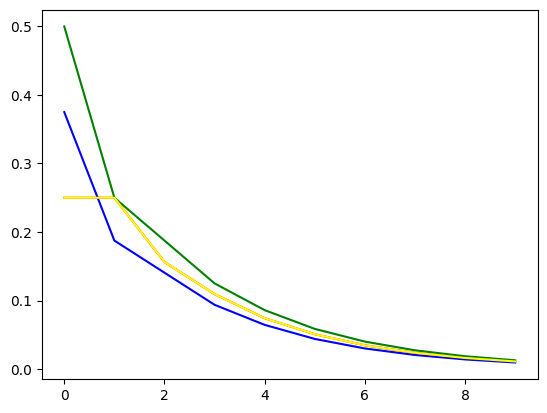

In [39]:
import torch
temp = torch.tensor(
    [[0.25,  0.5 ],
    [ 0.375, 0.25]],
    dtype=torch.float32,
    requires_grad=False)

print(temp)

temp1 = temp
tensor_list = [temp1]

n = 10
for i in range(n):
    temp1 = torch.matmul(temp1, temp)
    # print(temp)
    # print(temp1)
    # print("\n")
    tensor_list.append(temp1)
    print(temp1)


As = [tensor_list[i][0][0].numpy() for i in range(n)]
Bs = [tensor_list[i][0][1].numpy() for i in range(n)]
Cs = [tensor_list[i][1][0].numpy() for i in range(n)]
Ds = [tensor_list[i][1][1].numpy() for i in range(n)]


import matplotlib.pyplot as plt
import numpy as np

Xs = [i for i in range(n)]

fig, ax = plt.subplots()
ax.plot(Xs, As, color="red")
ax.plot(Xs, Bs, color="green")
ax.plot(Xs, Cs, color="blue")
ax.plot(Xs, Ds, color="yellow")